# Logistic Regression
## Loading the Data

In the section we do the e importing the required packages and loading the titanic data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [2]:
titanic1 = pd.read_csv("data/titanictrain.csv")
titanic2 = pd.read_csv("data/titanictest.csv")
titanic = pd.concat([titanic1,titanic2])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here, we see the different variables included in the data set. Let us briefly describe each variable:

- **PassengerId**: The ID of the passenger;
- **Survived**: The target variable; whether the person survived the shipwreck (1) or did not survive the shipwreck (0);
- **Pclass**: The class the passenger was in on the ship (1, 2 or 3);
- **Name**: The name of the passenger;
- **Sex**: The gender of the passenger;
- **Age**: The age of the passenger;
- **SibSp**: Number of siblings and spouses on the ship;
- **Parch**: Number of parents / children on the ship;
- **Ticket**: Number of the ticket;
- **Fare**: The fare of the ticket;
- **Cabin**: Number of the cabin;
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southhampton).

## Pre-Processing

When applying any predictive algorithm, we can never use it immediately without having done any pre-processing of the data. This step is extremely important, and can never be overlooked. For this data set, we perform the following pre-processing steps:

**1. Drop features that do not seem to add any value to our model**

In [3]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Here, we drop the PassengerId, Name, Ticket and Cabin features from the data set. The reason for this, is that these do not supply any predictive power to our model.

**2. Create categorical dummies for the embarkment ports**

In [4]:
ports = pd.get_dummies(titanic.Embarked, prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


We created three binary features from the categorical Embarked feature, since the model cannot handle the string names in the original categorical variable.

In [5]:
titanic = titanic.join(ports)
titanic.drop(['Embarked'], axis=1, inplace=True)

**3. Transform gender names to binaries**

In [6]:
titanic.Sex = titanic.Sex.map({'male': 0, 'female': 1})

Transform the ‘male’ and ‘female’ names to binaries (0 and 1) through a mapping.

**4. Replace missing values**

In [7]:
titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,NaN,3,0,34.5,0,0,7.8292,0,0,1
0,NaN,3,0,34.5,0,0,7.8292,0,1,0
1,NaN,3,1,47.0,1,0,7.0000,1,0,0
1,NaN,3,1,47.0,1,0,7.0000,0,0,1
2,NaN,2,0,62.0,0,0,9.6875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
859,0.0,3,0,NaN,0,0,7.2292,1,0,0
863,0.0,3,1,NaN,8,2,69.5500,0,0,1
868,0.0,3,0,NaN,0,0,9.5000,0,0,1
878,0.0,3,0,NaN,0,0,7.8958,0,0,1


Note that all the missing values (NaNs) appear to be in the Age feature. To solve for these missing values, let us fill the missing values with the average age in the data.

In [8]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

And finally lets have a look at our resulting data

In [9]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,22.000000,1,0,7.2500,0,0,1
0,0.0,3,0,22.000000,1,0,7.2500,0,1,0
0,NaN,3,0,34.500000,0,0,7.8292,0,0,1
0,NaN,3,0,34.500000,0,0,7.8292,0,1,0
1,1.0,1,1,38.000000,1,0,71.2833,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,0,27.000000,0,0,13.0000,0,0,1
887,1.0,1,1,19.000000,0,0,30.0000,0,0,1
888,0.0,3,1,29.722078,1,2,23.4500,0,0,1
889,1.0,1,0,26.000000,0,0,30.0000,1,0,0


In [10]:
titanic.dropna(inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,0,7.2500,0,0,1
0,0.0,3,0,22.0,1,0,7.2500,0,1,0
1,1.0,1,1,38.0,1,0,71.2833,1,0,0
1,1.0,1,1,38.0,1,0,71.2833,0,0,1
2,1.0,3,1,26.0,0,0,7.9250,0,0,1


## Train and Test split

Now that we have pre-processed the data, we can extract the explanatory variables in X and the target variable in y:

In [11]:
y = titanic.Survived.copy()
X = titanic.drop(['Survived'], axis=1)

Next, we split the data in a training and test set. The training set is used to train the logistic regression model. The model learns from the features included in the training set. The test set is used to validate the performance of the logistic regression model. For each observation in the test set, we predict whether the person survived or not, and compare the predictions with the true values.

We split the data so that the training set consists of 75% of the data, and the test set consists of 25% of the data. We make use of the train_test_split module of the scikit-learn package.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## Logistic Regression Model
By making use of the LogisticRegression module in the scikit-learn package, we can fit a logistic regression model, using the features included in X_train, to the training data.

In [28]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Now we can also have a look at the feature coefficients, i.e. how important each feature is to the classification.

In [29]:
coefficients_list = model.coef_.tolist()[0]
features_list = X.columns.values.tolist()
dict(zip(features_list, coefficients_list))

{'Pclass': -1.0022131343276823,
 'Sex': 2.7027185231761295,
 'Age': -0.035090966431806425,
 'SibSp': -0.4709086376560685,
 'Parch': 0.08155364027056582,
 'Fare': 0.0005939653686342778,
 'Embarked_C': 0.4074771163427398,
 'Embarked_Q': 0.7487901480761763,
 'Embarked_S': 0.16221514077010227}

Next, now that we have trained the logistic regression model on the training data, we are able to use the model to predict whether the persons included in the test set survived the shipwreck:

In [30]:
y_pred = pd.Series(model.predict(X_test))

y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0


Here, we see that for the first five observations of the test set, the logistic regression model predicted 4 out of 5 correctly.

To evaluate the entire test set, we can use the metrics module from the scikit-learn package.

In [31]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7682926829268293
Precision: 0.7105263157894737
Recall: 0.6532258064516129


That is, the logistic regression model results in 80.3% accuracy. Definitely not bad for such a simple model!

Of course, the model performance could be further improved by e.g. conducting further pre-processing, feature selection and feature extraction. However, this model forms a solid baseline.

A nice way to visualize the results of the model is by making use of a confusion matrix. Here, we use matplotlib and seaborn to create a nice confusion matrix figure.

Text(0.5, 15.0, 'Predicted')

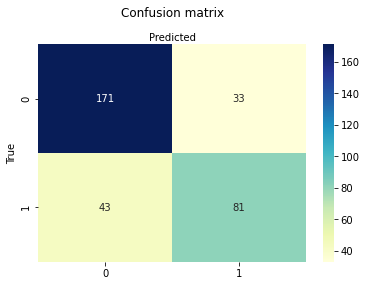

In [32]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plot.subplots()
tick_marks = np.arange(len(labels))
plot.xticks(tick_marks, labels)
plot.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pandas.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plot.title('Confusion matrix', y=1.1)
plot.ylabel('True')
plot.xlabel('Predicted')

In the confusion matrix, we see that 121 persons that did not survive the shipwreck were correctly predicted as not surviving, 18 persons that did not survive the shipwreck were incorrectly predicted as surviving the shipwreck, 26 persons that survived the shipwreck were incorrectly predicted as not surviving the shipwreck and lastly, 58 persons that survived the shipwreck were correctly predicted.

## Pros and Cons of the Logistic Regression

**Pros:**

- Does not require high computation power;
- Easy to implement;
- Straightforward interpretability.

**Cons:**

- Vulnerable to overfitting;
- Cannot solve non-linear problems;
- Not able to handle a large number of categorical features.